In [1]:
%tensorflow_version 1.x
import sys
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/nn/conv')
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from minivggnet import MiniVGGNet
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
print("[INFO] loading CIFAR-10 data...")

((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float")/255.0
testX = testX.astype("float")/255.0

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

labelNames = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

[INFO] loading CIFAR-10 data...


In [3]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [5]:
print("[INFO] training network...")
H = model.fit(trainX,  trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 14s 274us/step - loss: 1.3822 - acc: 0.5210 - val_loss: 1.4690 - val_acc: 0.5111
Epoch 2/40
50000/50000 [==============================] - 14s 272us/step - loss: 1.0733 - acc: 0.6251 - val_loss: 0.8609 - val_acc: 0.7004
Epoch 3/40
50000/50000 [==============================] - 13s 270us/step - loss: 0.9215 - acc: 0.6765 - val_loss: 0.7923 - val_acc: 0.7158
Epoch 4/40
50000/50000 [==============================] - 13s 268us/step - loss: 0.8326 - acc: 0.7070 - val_loss: 0.7647 - val_acc: 0.7337
Epoch 5/40
50000/50000 [==============================] - 13s 270us/step - loss: 0.7643 - acc: 0.7299 - val_loss: 0.7535 - val_acc: 0.7381
Epoch 6/40
50000/50000 [==============================] - 13s 269us/step - loss: 0.7134 - acc: 0.7487 - val_loss: 0.6906 - val_acc: 0.7593
Epoch 7/40
50000/50000 [==============================] - 14s 272us/step - loss: 0.6683 -

In [6]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.86      0.85      0.85      1000
  automobile       0.92      0.91      0.91      1000
        bird       0.75      0.72      0.74      1000
         cat       0.72      0.60      0.66      1000
        deer       0.75      0.84      0.79      1000
         dog       0.76      0.74      0.75      1000
        frog       0.83      0.88      0.86      1000
       horse       0.86      0.86      0.86      1000
        ship       0.87      0.92      0.90      1000
       truck       0.88      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



/content/drive/My Drive/Colab_Work


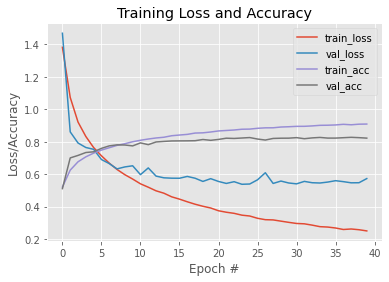

In [7]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
%cd /content/drive/My\ Drive/Colab_Work
plt.savefig('minivggnet_cifar10_train_test_plot.png')